In [1]:
import os
# for data transformation 
import numpy as np 
from tensorflow import keras
# for audio pre processing
import librosa, librosa.display
# for visualizing the data 
import matplotlib.pyplot as plt 
#splitting into train and test
from sklearn.model_selection import train_test_split

from keras.models import Sequential,Input,Model

from keras.layers import Conv1D, MaxPooling1D

from keras.layers.advanced_activations import LeakyReLU

from keras.layers import Dense, Dropout, Flatten

from sklearn.metrics import confusion_matrix

import sklearn


In [2]:
def get_path(path):
    newpath = []
    os.chdir(path)
    for file in os.listdir():
        if file.endswith(".wav"):
            file_path = f"{path}\{file}"
            newpath.append(file_path)
    return newpath


In [3]:
#function for plotting waveform

def plot_waveform(sig, sr):
    plt.figure(figsize=fig_size)
    librosa.display.waveplot(sig, sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")
    plt.show()
    


In [4]:
#function for plotting ffts

def plot_fft(sig, sr):
    fft = np.fft.fft(sig)
    spectrum = np.abs(fft)
    f = np.linspace(0, sr, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    plt.figure(figsize=fig_size)
    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Power spectrum")
    #plt.ylim(-1,2)
    plt.show()
    


In [5]:
#function for plotting mfccs

def plot_mfccs(sig, sr):
    hop_length = 512 
    n_fft = 2048
    mfccs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    print(mfccs.shape)
    plt.figure(figsize=fig_size)
    librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title
    plt.show()


In [6]:
#Function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion  Matrix', cmap = plt.cm.Blues):
        
        
    plt.subplots(figsize = (6, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x = j, y = i, s = cm[i, j],
                    horizontalalignment = "center",
                    color = "white" if cm[i, j] > thresh else "black", size = 'xx-large')
        
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.ylim(len(cm)-0.5, 0.5)
    plt.show

    

In [7]:


targets = ['merd3', 'merd7']
targets_dir = ['merd3_chunked', 'merd7_chunked']
data_arr = []
target_arr = []
sample_rate_arr = []
datadir = r'C:\Users\Jemil\Desktop\Master\kode'

for i in targets_dir:
    print(f'loading... category: {i}')
    path = os.path.join(datadir,i)
    paths = get_path(path) 
    for j in range(len(paths)):
        tempsignal, tempsample_rate = librosa.load(paths[j], sr=None)
        data_arr.append(tempsignal)
        sample_rate_arr.append(tempsample_rate)
        target_arr.append(targets_dir.index(i))
    print(f'loaded category: {i} successfully')

loading... category: merd3_chunked
loaded category: merd3_chunked successfully
loading... category: merd7_chunked
loaded category: merd7_chunked successfully


In [9]:
data = np.array(data_arr)
target = np.array(target_arr)
target_cat = keras.utils.to_categorical(target, len(targets))
data.shape

(4680, 160000)

In [ ]:
#plotting waveform, fft and 13 mfccs of data[60](from merd3) and data[2400](from merd7)

fig_size = (15,10)

plot_waveform(data[60], sample_rate_arr[60])
plot_waveform(data[2400], sample_rate_arr[2400])

plot_fft(data[60], sample_rate_arr[60])
plot_fft(data[2400], sample_rate_arr[2400])

plot_mfccs(data[60], sample_rate_arr[60])
plot_mfccs(data[2400], sample_rate_arr[2400])



In [12]:
#split in test and train
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, shuffle=True)
print(X_train)

[[ 2.6565790e-03  1.5733242e-03  1.4890432e-03 ...  1.3711214e-02
   1.2921214e-02  1.1826396e-02]
 [ 5.9366226e-05  6.6518784e-05  6.0081482e-05 ...  2.4485588e-03
   2.3659468e-03  2.4055243e-03]
 [-6.2489556e-04 -6.3288258e-04 -6.9069909e-04 ...  3.7310123e-03
   3.7170649e-03  3.7385225e-03]
 ...
 [ 4.3013096e-03  4.2169094e-03  4.3674707e-03 ...  1.3957024e-03
   7.9858303e-04  4.8053265e-04]
 [ 2.7601719e-03  2.6891232e-03  2.5492907e-03 ...  4.4229031e-03
   4.4502020e-03  4.4716597e-03]
 [-4.6354537e-03 -4.6545272e-03 -4.6715741e-03 ...  4.0078163e-03
   4.0065050e-03  4.0326118e-03]]


In [13]:
x_train = (X_train - X_train.mean()) / X_train.std()
x_test = (X_test - X_test.mean()) / X_test.std()


In [189]:
mfcc_data_arr_train = []
for i in range(len(x_train)):
    hop_length = 512 
    n_fft = 2048
    mfcc = librosa.feature.mfcc(x_train[i], sample_rate_arr[i], n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    mfcc_data_arr_train.append(mfcc)
mfcc_train = np.array(mfcc_data_arr_train)

mfcc_data_arr_test = []
for i in range(len(x_test)):
    hop_length = 512 
    n_fft = 2048
    mfcc = librosa.feature.mfcc(x_test[i], sample_rate_arr[i], n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    mfcc_data_arr_test.append(mfcc)
mfcc_test = np.array(mfcc_data_arr_test)

Epoch 1/100
169/169 [==============================] - 2s 7ms/step - loss: 1.3769 - accuracy: 0.8421 - val_loss: 0.1169 - val_accuracy: 0.9733
Epoch 2/100
169/169 [==============================] - 1s 6ms/step - loss: 0.2357 - accuracy: 0.9478 - val_loss: 0.3103 - val_accuracy: 0.8693
Epoch 3/100
169/169 [==============================] - 1s 6ms/step - loss: 0.1463 - accuracy: 0.9629 - val_loss: 0.3123 - val_accuracy: 0.9040
Epoch 4/100
169/169 [==============================] - 1s 7ms/step - loss: 0.0982 - accuracy: 0.9751 - val_loss: 0.1157 - val_accuracy: 0.9787
Epoch 5/100
169/169 [==============================] - 1s 6ms/step - loss: 0.0763 - accuracy: 0.9825 - val_loss: 0.0231 - val_accuracy: 0.9947
Epoch 6/100
169/169 [==============================] - 1s 6ms/step - loss: 0.1203 - accuracy: 0.9754 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 7/100
169/169 [==============================] - 1s 6ms/step - loss: 0.1043 - accuracy: 0.9771 - val_loss: 0.0952 - val_accuracy: 0.9733

<function matplotlib.pyplot.show(*args, **kw)>

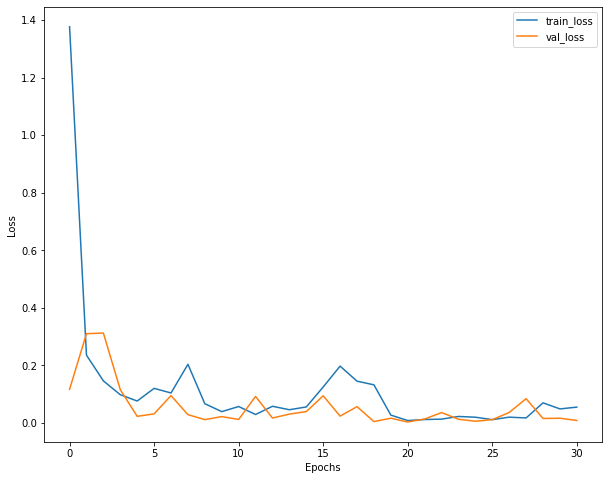

In [200]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=10)

num_classes=2
sample_shape = mfcc_train[0].shape

model_new = Sequential()
model_new.add(Conv1D(32, kernel_size=(3),
                 padding='same', input_shape = sample_shape))
model_new.add(LeakyReLU(alpha=0.1))
#model_new.add(keras.layers.Activation('relu'))
model_new.add(MaxPooling1D((2), padding='same'))

model_new.add(Conv1D(64, (3), padding='same'))
model_new.add(LeakyReLU(alpha=0.1))
#model_new.add(keras.layers.Activation('relu'))
model_new.add(MaxPooling1D(pool_size=(2), padding='same'))

model_new.add(Conv1D(64, (3), padding='same'))
model_new.add(LeakyReLU(alpha=0.1))
model_new.add(MaxPooling1D(pool_size=(2),padding='same'))
model_new.add(Dropout(0.2))

model_new.add(Flatten())
model_new.add(Dense(128))
model_new.add(LeakyReLU(alpha=0.1))
#model_new.add(keras.layers.Activation('relu'))
model_new.add(Dense(num_classes-1, activation='sigmoid'))

model_new.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fit_mo = model_new.fit( mfcc_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.1, callbacks=[callback])
plt.figure(figsize = (10, 8))
plt.plot(fit_mo.history['loss'], label = 'train_loss')
plt.plot(fit_mo.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.grid
plt.legend()
plt.show

936
              precision    recall  f1-score   support

       merd3       0.99      0.99      0.99       470
       merd7       0.99      0.98      0.99       466

    accuracy                           0.99       936
   macro avg       0.99      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



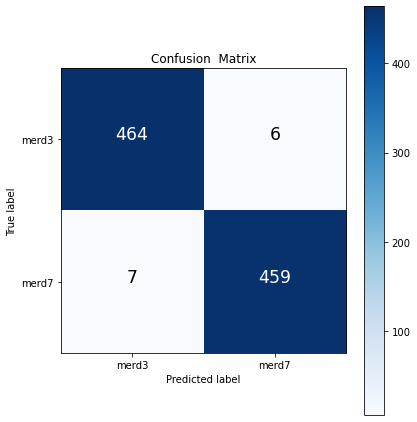

In [201]:

y_pred = model_new.predict(mfcc_test)
print(len(y_pred))

y_predd=[]
for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_predd.append(1)
        else:
            y_predd.append(0)


cm = confusion_matrix(y_test, y_predd)
plot_confusion_matrix(cm, targets)

class_rep = sklearn.metrics.classification_report(y_test, y_predd, 
                                     target_names = targets)
print(class_rep)
